In [15]:
import json

with open('results.json') as f:
    results = json.load(f)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 10)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = features[i][1]
        # image = image / 255.0
        ax.set_title(f"{label}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [18]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['right', 0.21900834952130005], ['shape', 0.14973600312138638], ['position', 0.11430920631420322], ['left', 0.09879886076180604], ['canvas', 0.09559380155268724], ['rotate', 0.09407260353817085], ['up', 0.09033624892223209], ['blank', 0.09024296809163214], ['white', 0.08975333832510321], ['this', 0.0722975038092957]]


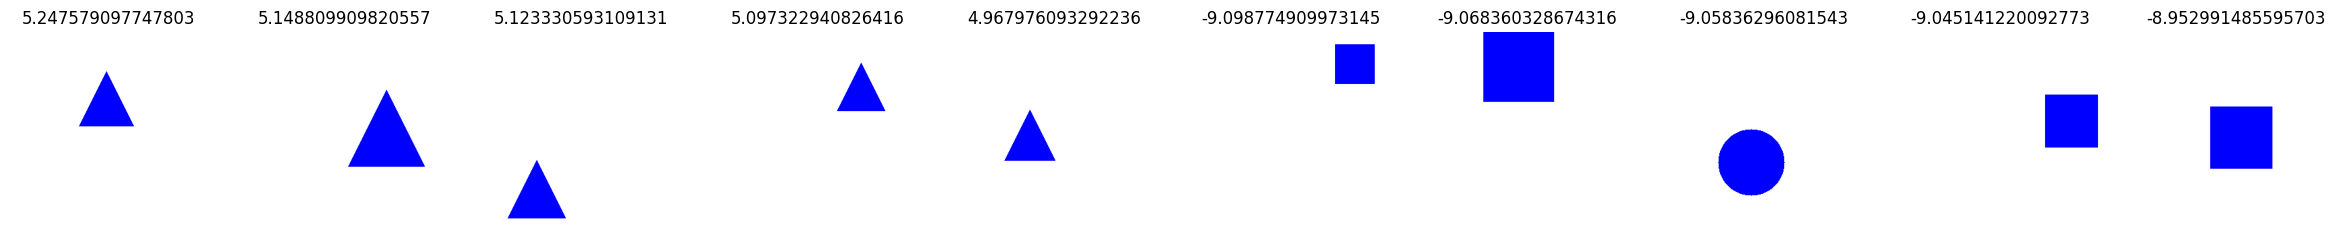

Concept #1

[['green', 0.40204962094624835], ['white', 0.17044310557065068], ['bottom', 0.13987289412842965], ['right', 0.11727359533124933], ['angle', 0.10614260491438028], ['blank', 0.10480148201523912], ['blue', 0.10101759268985532], ['<pad>', 0.09467564268809993], ['left', 0.08414349499876234], ['shape', 0.07722373270205043]]


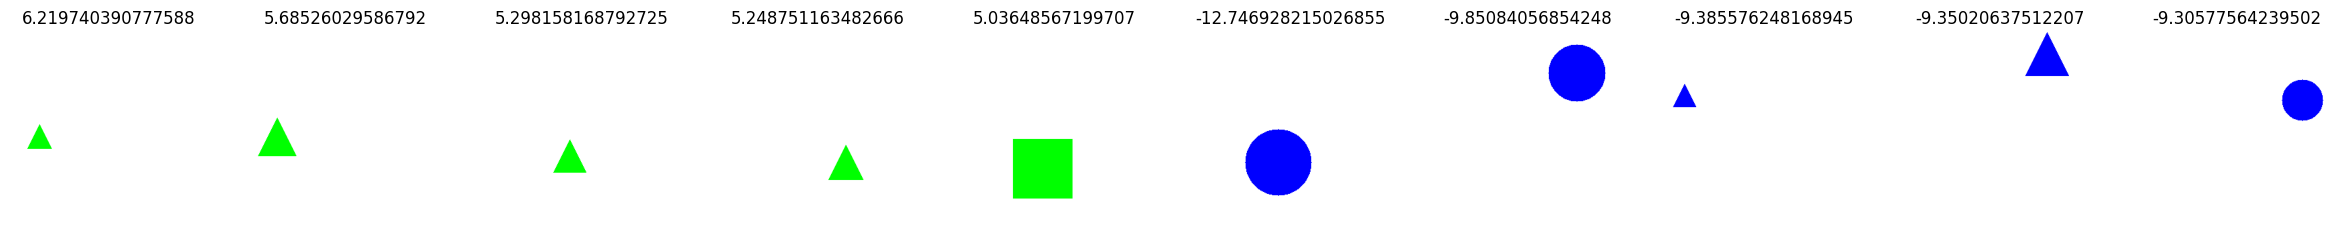

Concept #2

[['green', 0.5609149145129008], ['red', 0.45635739084393756], ['blue', 0.30504221674168436], ['color', 0.26242406046961947], ['shape', 0.1334403592194645], ['three', 0.06740522702656142], ['round', 0.05940112794438998], ['four', 0.04366092678856074], ['blank', 0.03502631928006147], ['up', 0.026473595756500344]]


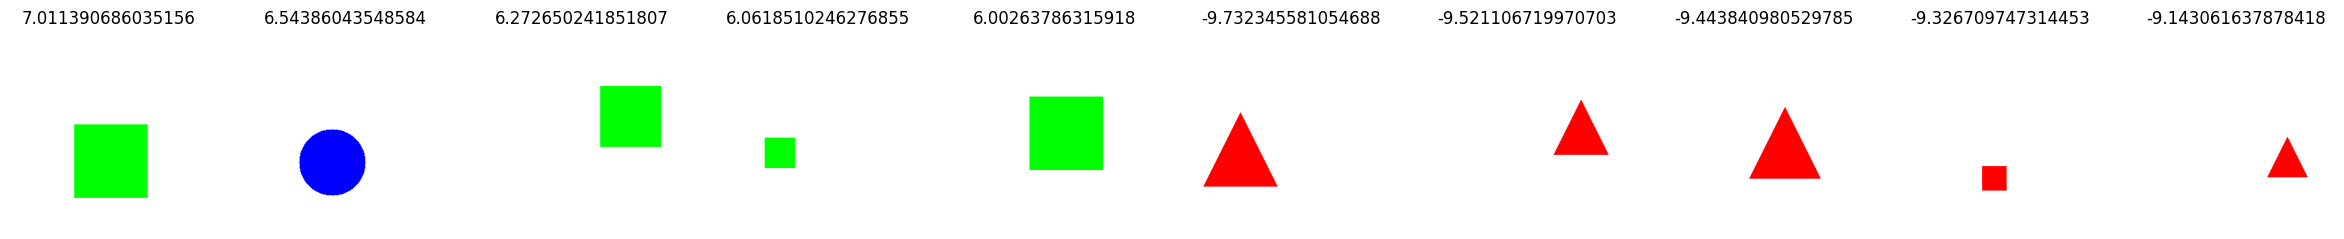

Concept #3

[['three', 0.19767108237355704], ['shape', 0.1521570542196271], ['blue', 0.12726598608542264], ['left', 0.1179598502356392], ['is', 0.11374782173614192], ['has', 0.10539460755218336], ['color', 0.10152116810807045], ['red', 0.08290536202550904], ['right', 0.07646122150980861], ['bottom', 0.07635544061307804]]


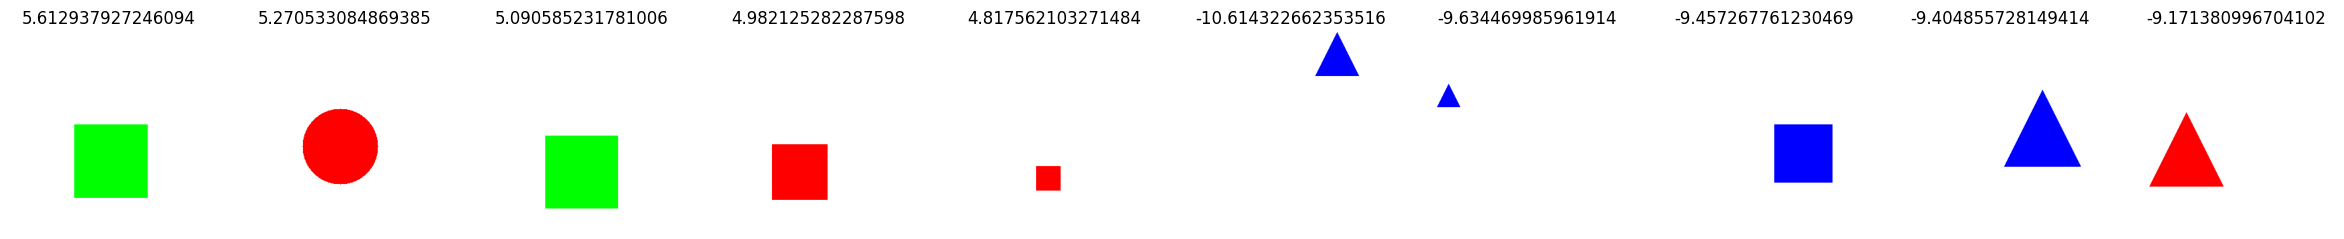

Concept #4

[['this', 0.7170994934027757], ['shape', 0.13182664924278492], ['left', 0.04665724807287779], ['blank', 0.04086919093395484], ['unrotate', 0.024946615127618962], ['canvas', 0.019232384428927083], ['white', 0.016772662885142852], ['bottom', 0.013730360462640083], ['has', 0.01299526418703116], ['angle', 0.011541561219023496]]


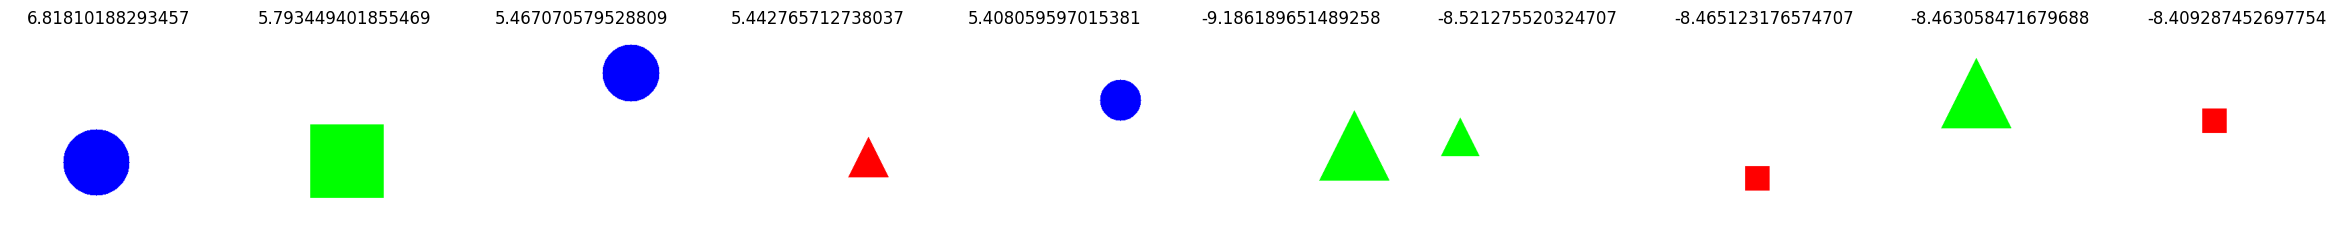

Concept #5

[['blue', 0.47132188188351265], ['angle', 0.4184285626663425], ['left', 0.1328560693638168], ['red', 0.10643798186466462], ['green', 0.08790421437138948], ['blank', 0.07978421787760219], ['up', 0.06014366074011275], ['<pad>', 0.05792809533394449], ['rotate', 0.05686886737790717], ['position', 0.05538962655486211]]


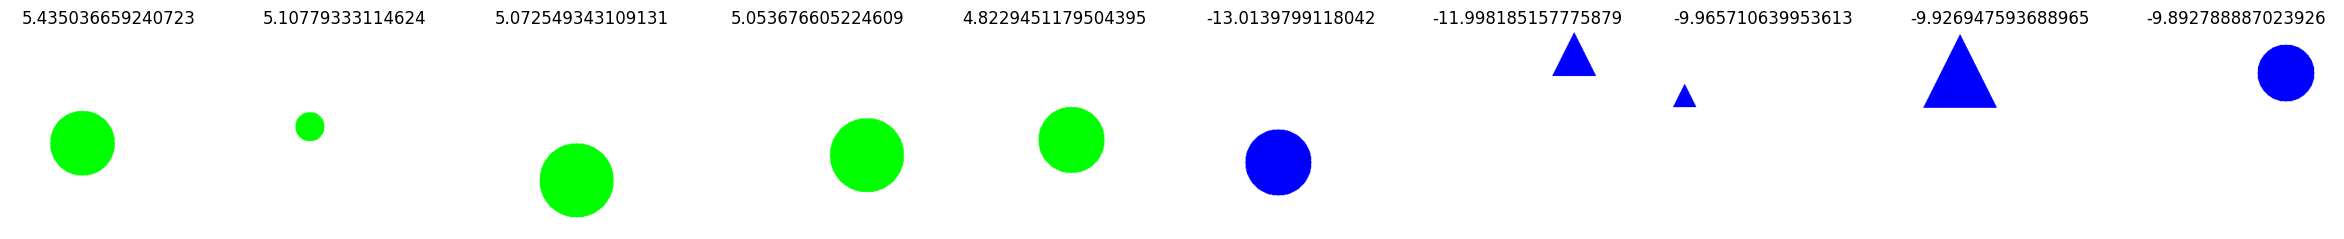

Concept #6

[['this', 0.2669802983924948], ['position', 0.2111838432185372], ['rotate', 0.18348877344577186], ['right', 0.08779041446392208], ['left', 0.083102721658781], ['up', 0.08038434272874957], ['unrotate', 0.07886649473044748], ['canvas', 0.059418864901553646], ['blank', 0.058074290227961865], ['shape', 0.05287505145762671]]


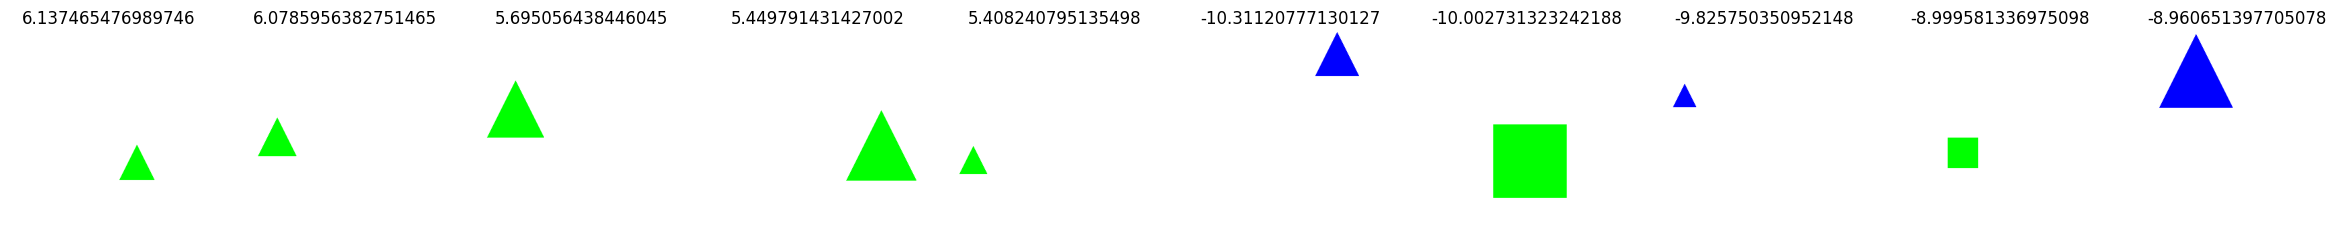

Concept #7

[['green', 0.6549065555256557], ['four', 0.32992618610946145], ['round', 0.23122703144705392], ['three', 0.22880520253646663], ['blue', 0.15470929281649792], ['color', 0.11093651621241557], ['this', 0.09022172200001352], ['rotate', 0.08548020791423103], ['unrotate', 0.07704472016072045], ['red', 0.05748590933068133]]


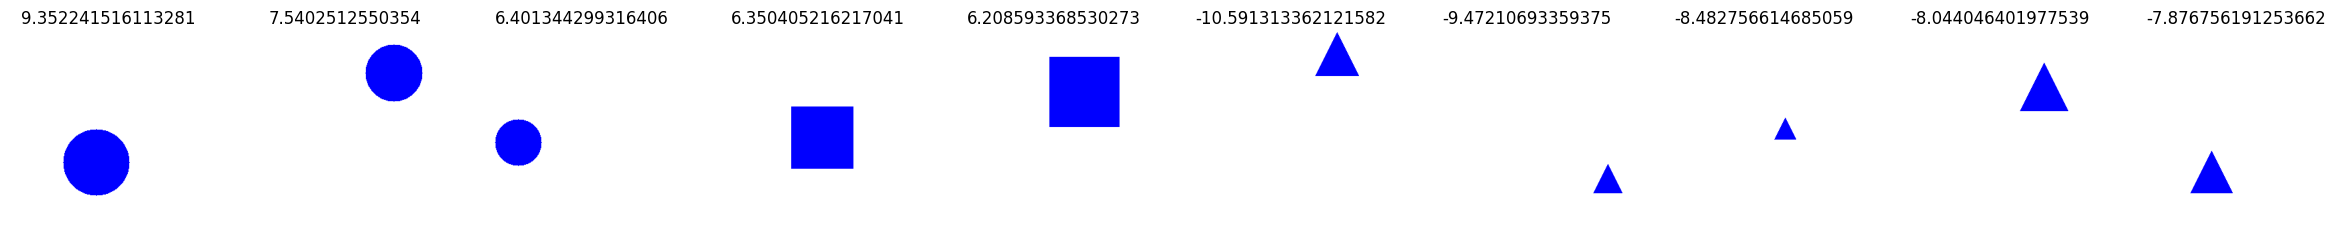

Concept #8

[['is', 0.1786029464830228], ['color', 0.1350675930256443], ['left', 0.12271463864786906], ['position', 0.11745188306098385], ['has', 0.11730917870271497], ['shape', 0.10221387058658006], ['unrotate', 0.10112588832057878], ['red', 0.09524416373815478], ['rotate', 0.08332672067382167], ['up', 0.0817100718208254]]


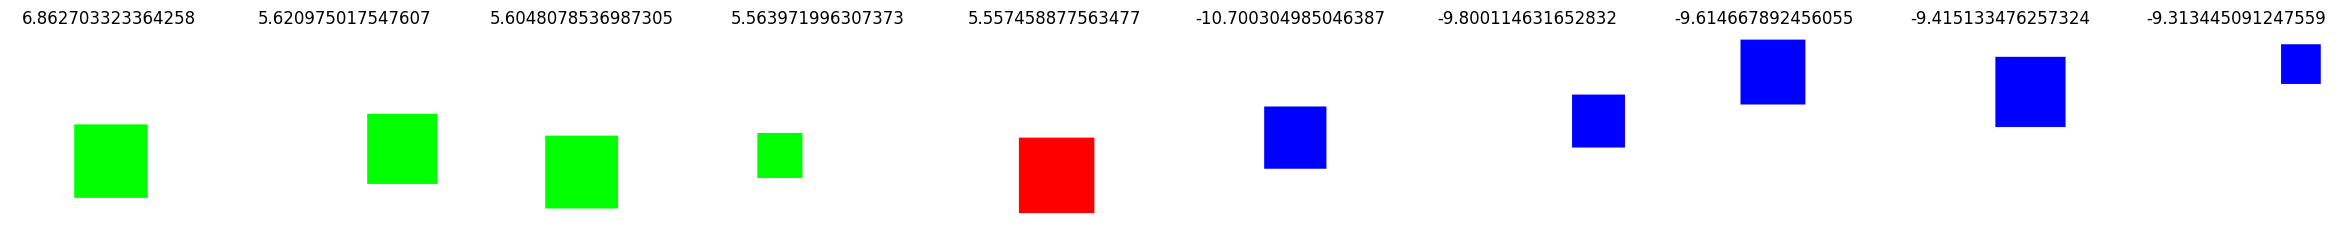

Concept #9

[['shape', 0.30314807358796036], ['rotate', 0.09712286630595944], ['blank', 0.09303336053333928], ['position', 0.09214792064615704], ['blue', 0.07665581434238247], ['canvas', 0.0763389243847794], ['red', 0.07440012163384174], ['left', 0.07234138968799796], ['three', 0.06751370465731234], ['round', 0.06335760960128249]]


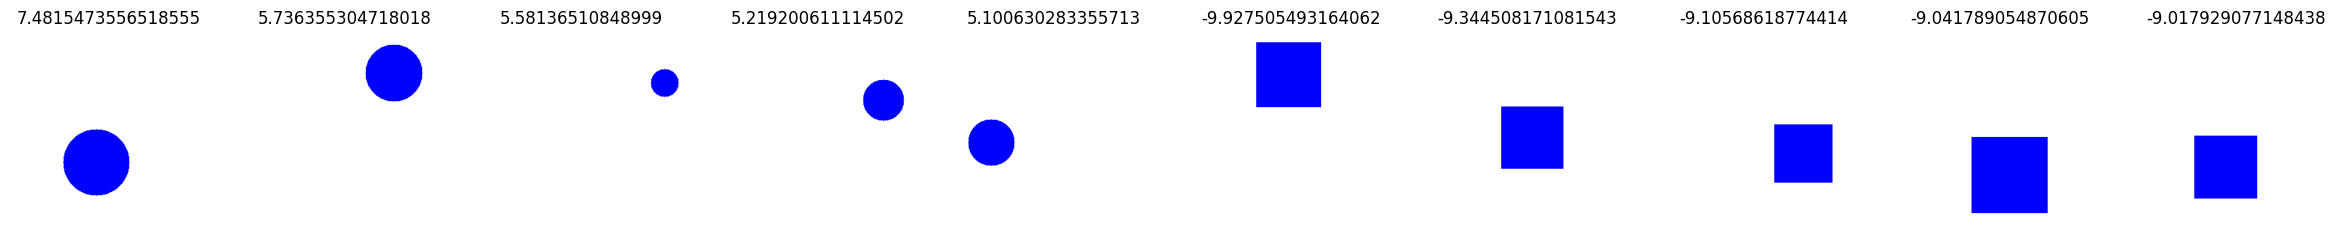

In [19]:
for i in range(10):
    visualize_concept(i)